📊 Case: Inteligência de Dados para Gestão de Serviços (2019)
📋 Visão Geral
Este projeto consiste em uma análise profunda dos indicadores operacionais e financeiros de uma empresa de prestação de serviços no ano de 2019. Através do processamento de múltiplas fontes de dados (Funcionários, Clientes e Serviços), o objetivo é transformar bases brutas em insights estratégicos para a tomada de decisão da diretoria.

🛠️ Tecnologias e Conceitos Aplicados
Linguagem: Python

Biblioteca Principal: Pandas

Técnicas utilizadas:

Data Wrangling: Limpeza e tratamento de dados (ajuste de encoding e delimitadores).

Database Merging: Consolidação de diferentes fontes de dados para análises cruzadas.

Agregação de Dados: Uso de Group By, Value Counts e estatística descritiva.

Lógica de Negócio: Transformação de variáveis técnicas em indicadores financeiros (KPIs).

🎯 KPIs Analisados (Principais Entregáveis)
Neste projeto, respondo a seis perguntas fundamentais para a saúde do negócio:

Custo Operacional: Cálculo da folha salarial integral (Salários + Encargos + Benefícios).

Performance Financeira: Faturamento bruto anual consolidado.

Eficiência de Vendas: Identificação do percentual de funcionários ativos na geração de novos contratos.

Distribuição de Mercado: Volume de contratos fechados por área de negócio.

Capacidade Instalada: Censo de pessoal por departamento.

Ticket Médio: Valor médio mensal dos contratos, essencial para estratégias de precificação.

💡 Por que este projeto é relevante?
Este notebook demonstra minha capacidade de manipular bases de dados reais, lidar com problemas comuns de importação e gerar relatórios que conectam a operação (RH e Vendas) com o resultado financeiro final (Faturamento e Lucratividade).

In [1]:
#importando os arquivos necessarios
import pandas as pd

#lendo o arquivo csv
file_path = r'C:/Users/Análise de Dados/'
employees = pd.read_csv(file_path + 'CadastroFuncionarios.csv', sep=';',decimal=',')
customers = pd.read_csv(file_path + 'CadastroClientes.csv', sep=';',decimal=',')
offers = pd.read_excel(file_path + 'BaseServiçosPrestados.xlsx')
#exibindo as 5 primeiras linhas do dataframe employees
display(employees.head())
display(customers.head())
display(offers.head())

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


In [2]:
employees['Folha de Pagamento'] = employees['Salario Base'] + employees['Impostos'] + employees['Beneficios'] + employees['VT'] + employees['VR']
employees.head()
#efetuando a soma total da folha de pagamento
total_pay_roll = employees['Folha de Pagamento'].sum()
print(f'Total da Folha de Pagamento: R$ {total_pay_roll:,.2f}')

Total da Folha de Pagamento: R$ 2,717,493.22


In [4]:
faturamento_df = offers.merge(customers, on='ID Cliente')
faturamento_df['Faturamento Total'] = faturamento_df['Valor Contrato Mensal'] * faturamento_df['Tempo Total de Contrato (Meses)']
faturamento_df['Ticket Médio'] = faturamento_df['Faturamento Total'] / faturamento_df['Tempo Total de Contrato (Meses)']
#display(faturamento_df.head())
#efetuando a soma total do faturamento
total_revenue = faturamento_df['Faturamento Total'].sum()
print(f'Total do Faturamento: R$ {total_revenue:,.2f}')

Total do Faturamento: R$ 5,519,160.00


In [10]:
#calculando a quantidade de funcionários que fecharam contratos
total_employees = len(employees['ID Funcionário'])
employees_with_contracts = len(offers['ID Funcionário'].unique())

#print(employees_with_contracts, total_employees)

percentage_employees_with_contracts = (employees_with_contracts / total_employees)
print(f'Percentual de funcionários que fecharam contratos: {percentage_employees_with_contracts:.2%}')

Percentual de funcionários que fecharam contratos: 86.84%


In [37]:
contracts_area = pd.merge(offers[['ID Funcionário','Tempo Total de Contrato (Meses)']], employees[['ID Funcionário','Area']], on='ID Funcionário')
display(contracts_area.head())

amount_contracts_area = contracts_area['Area'].value_counts().reset_index()
amount_contracts_area.columns = ['Area', 'Total de Contratos']
display(amount_contracts_area)

,ID Funcionário,Tempo Total de Contrato (Meses),Area
0,67,14,Financeiro
1,17,12,Logística
2,116,14,Logística
3,37,8,Financeiro
4,130,8,Comercial


,Area,Total de Contratos
0,Administrativo,63
1,Operações,48
2,Comercial,44
3,Financeiro,42
4,Logística,40


,Total de Funcionários
Area,
Administrativo,26
Comercial,26
Operações,23
Logística,21
Financeiro,18


<Axes: title={'center': 'Quantidade de Funcionários por Área'}, ylabel='Total de Funcionários'>

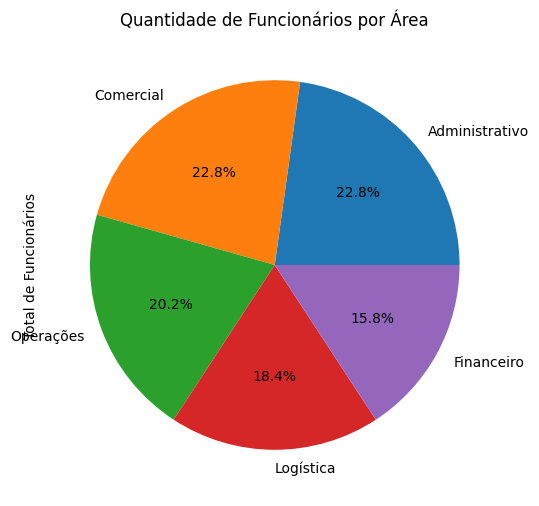

In [50]:
amount_employees = employees['Area'].value_counts().reset_index()
amount_employees.columns = ['Area', 'Total de Funcionários']
amount_employees = amount_employees.set_index('Area')
display(amount_employees)
amount_employees.plot(kind='pie', x='Area', y='Total de Funcionários', title='Quantidade de Funcionários por Área', figsize=(10,6),color='skyblue',legend=False, autopct='%1.1f%%')

In [52]:
ticket_medio = customers['Valor Contrato Mensal'].mean()
print(f'Ticket Médio dos Clientes: R$ {ticket_medio:,.2f}')

Ticket Médio dos Clientes: R$ 2,502.56
